## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
len(df)

130

## Is the distribution of body temperatures normal?

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

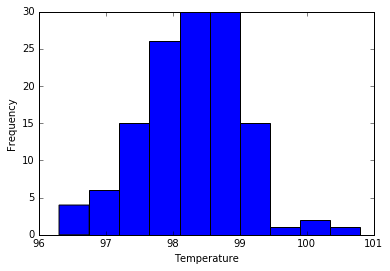

In [6]:
df.temperature.plot(kind='hist')
plt.ylabel('Frequency')
plt.xlabel('Temperature')

In [9]:
df.temperature.value_counts().nlargest(n=5)

98.0    11
98.6    10
98.8    10
98.2    10
98.4     9
Name: temperature, dtype: int64

In [16]:
import numpy as np
df_temp_mean = np.mean(df.temperature)
df_temp_sd = np.std(df.temperature)
temperatures = df.temperature.values

In [18]:
print df_temp_mean

98.2492307692


In [24]:
print temperatures

[  99.3   98.4   97.8   99.2   98.    99.2   98.    98.8   98.4   98.6
   98.8   96.7   98.2   98.7   97.8   98.8   98.3   98.2   97.2   99.4
   98.3   98.2   98.6   98.4   97.8   98.    97.8   98.2   98.4   98.1
   98.3   97.6   98.5   98.6   99.3   99.5   99.1   98.3   97.9   96.4
   98.4   98.4   96.9   97.2   99.    97.9   97.4   97.4   97.9   97.1
   98.9   98.3   98.5   98.6   98.2   98.6   98.8   98.2   98.2   97.6
   99.1   98.4   98.2   98.6   98.7   97.4   97.4   98.6   98.7   98.9
   98.1   97.7   98.    98.8   99.    98.8   98.    98.4   97.4   97.6
   98.8   98.    97.5   99.2   98.6   97.1   98.6   98.    98.7   98.1
   97.8  100.    98.8   97.1   97.8   96.8   99.9   98.7   98.8   98.    99.
   98.5   98.    99.4   97.6   96.7   97.    98.6   98.7   97.3   98.8
   98.    98.2   99.1   99.    98.   100.8   97.8   98.7   98.4   97.7
   97.9   99.    97.2   97.5   96.3   97.7   98.2   97.9   98.7]


In [22]:
print df_temp_sd

0.730357778905


In [23]:
len(temperatures[(temperatures>df_temp_mean-df_temp_sd) & (temperatures<df_temp_mean+df_temp_sd)])

90

In [28]:
print('Proportion of values within one standard deviation of the mean:',
      float(len(temperatures[(temperatures>df_temp_mean-df_temp_sd) & (temperatures<df_temp_mean+df_temp_sd)]))/len(temperatures))

print('Proportion of values within two standard deviations of the mean:',
      float(len(temperatures[(temperatures>df_temp_mean-2*df_temp_sd) & (temperatures<df_temp_mean+2*df_temp_sd)]))/len(temperatures))

print('Proportion of values within three standard deviations of the mean:',
      float(len(temperatures[(temperatures>df_temp_mean-3*df_temp_sd) & (temperatures<df_temp_mean+3*df_temp_sd)]))/len(temperatures))

('Proportion of values within one standard deviation of the mean:', 0.6923076923076923)
('Proportion of values within two standard deviations of the mean:', 0.9461538461538461)
('Proportion of values within three standard deviations of the mean:', 0.9923076923076923)


In [29]:
import scipy.stats as stats
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

## Is the true population mean really 98.6 degrees F?

In [30]:
from statsmodels.stats.weightstats import ztest
ztest(df.temperature,value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

In [31]:
stats.ttest_1samp(df.temperature,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

## At what temperature should we consider someone's temperature to be "abnormal"?

In [32]:
se = df_temp_sd/np.sqrt(len(df))
me = 1.96*se
confidence_interval = [df_temp_mean-me,df_temp_mean+me]
confidence_interval

[98.123679804428193, 98.374781734033363]

In [33]:
stats.norm.interval(.95,loc=df_temp_mean,scale=df_temp_sd/np.sqrt(len(df)))

(98.123682111456645, 98.37477942700491)

## Is there a significant difference between males and females in normal temperature?

In [34]:
female_temps = np.array(df.temperature[df.gender=='F']) #previously got values and cast to list
male_temps = np.array(df.temperature[df.gender=='M'])

print(len(male_temps))
print(len(female_temps))

65
65


In [35]:
stats.ttest_ind(female_temps,male_temps)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)